# Logistic Regression

In [1]:
# If you have not yet installed sklearn (aka scikit-learn), now is the time
# pip install scikit-learn

# Import the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size to (12,6)
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
# Import the dataset
df = pd.read_csv('penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [3]:
# Filter out one species
df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [4]:
# Kick out the Chinstraps
df_binary = df[df['species'] != 'Chinstrap'].dropna().copy()
df_binary.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


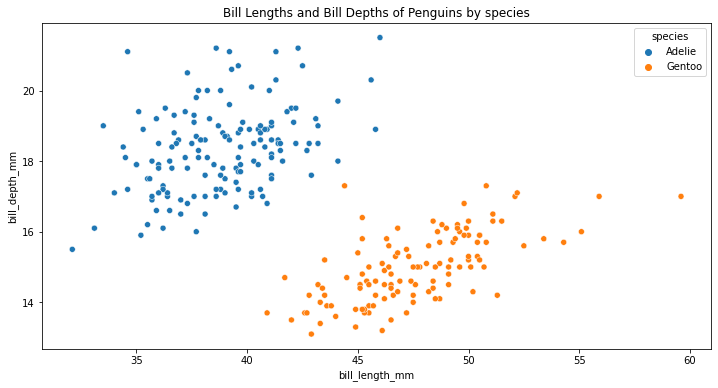

In [5]:
# Plot the Bill Depth of each penguin against its Bill Length
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df_binary,
               hue='species')
plt.title('Bill Lengths and Bill Depths of Penguins by species')
# plt.savefig('logisitc_regression_warmup_2.png')
plt.show()

# Implementation in code

In [6]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [7]:
# Define X, use the bill_length_mm and bill_depth_mm
X = df_binary[['bill_length_mm', 'bill_depth_mm']]

In [8]:
# Define y
y = df_binary['species']

In [9]:
# Split the data into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) # default .25

In [10]:
X_train.shape, X_test.shape

((212, 2), (53, 2))

In [11]:
y_train.shape, y_test.shape

((212,), (53,))

In [12]:
# Create a model
m = LogisticRegression()

In [13]:
# Train a model
m.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Use the model to make predictions on the seen data
# first_penguin = X_train.iloc[0]
first_penguin = X_train.head(1)

In [15]:
y_train[0]

'Adelie'

In [16]:
m.predict(first_penguin)

array(['Adelie'], dtype=object)

In [19]:
m.predict_proba(first_penguin)

array([[0.99809489, 0.00190511]])

In [22]:
m.predict(X_train)

array(['Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [17]:
# Look at the predicted probabilities
[[round (p0,2), round(p1,2)] for p0, p1 in m.predict_proba(X_train)]

In [23]:
# Is the model good?
m.score(X_train, y_train)

1.0

In [24]:
m.coef_

array([[ 1.06262087, -1.81021667]])

In [25]:
m.intercept_

array([-15.80468635])

## To-Dos for the afternoon:

### For me:

- Push the updated notebooks
- Push the lecture notes

### For you:

- Continue working on the Challenge "Exploratory Data Analysis" in section 2.1 of the course material http://krspiced.pythonanywhere.com/chapters/project_titanic/ml_fundamentals/README.html

- Challenge "Build a Logistic Regression Model" in section 2.3 of the course material
http://krspiced.pythonanywhere.com/chapters/project_titanic/logistic_regression/README.html

### Bonus challenges:

- Look at 2.3.3 of the course material and try to fit a logistic regression using scikit-learn instead of statsmodels